In [1]:
!nvidia-smi

Sat Feb  3 10:43:12 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P8              11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import os


In [3]:
print(f"tensorflow version {tf.__version__}")


tensorflow version 2.15.0


In [4]:
import keras
print(f"keras version {keras.__version__}")

keras version 2.15.0


In [5]:
!pwd

/content


In [6]:
Root= "/content/drive/MyDrive/Colab Notebooks"

In [7]:
Root

'/content/drive/MyDrive/Colab Notebooks'

In [8]:

os.chdir(Root)

In [9]:
!pwd

/content/drive/MyDrive/Colab Notebooks


In [10]:
tf.config.list_logical_devices('GPU')

[LogicalDevice(name='/device:GPU:0', device_type='GPU')]

In [11]:
len(tf.config.list_logical_devices('GPU'))

1

# check the devices available

In [12]:
check_list=["GPU","CPU"]
for devices in check_list:
  out=tf.config.list_logical_devices(devices)
  if len(out)>0:
    print(f"{devices} is available! ")
    print(f"details of {out}")
  else:
    print(f"device is not available ")


GPU is available! 
details of [LogicalDevice(name='/device:GPU:0', device_type='GPU')]
CPU is available! 
details of [LogicalDevice(name='/device:CPU:0', device_type='CPU')]


In [13]:
mnist=tf.keras.datasets.mnist

(x_train_full,y_train_full),(x_test,y_test)=mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


# mnist dataset load it from keras

In [14]:
(x_train_full.shape)

(60000, 28, 28)

In [15]:
y_train_full.shape

(60000,)

In [16]:
x_train_full

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [ ]:
y_train_full # lables of x_train data

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
x_test.shape

(10000, 28, 28)

In [ ]:
y_test.shape

(10000,)

In [ ]:
x_test[0] # pixles are ranging from 0 to 255

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [17]:
y_test[0] # y lables

7

<Axes: >

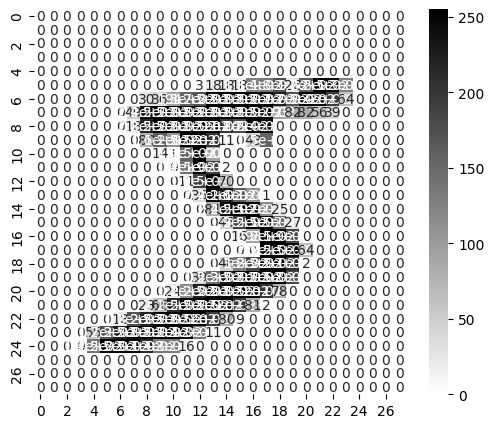

In [18]:
plt.figure(figsize=(6,5))
sns.heatmap(x_train_full[0],annot=True,cmap="binary")

In [19]:
# here we have to scaled the data beacuse pixles range 0-255
# we are using min-max scaler because its range (0-1)
# standard scaler range is (-1,1 )

In [20]:

# split the entire dataset into training, testing , validation
#doing minmax scaling of the dataset
x_vald,x_train=x_train_full[:5000]/255.,x_train_full[5000:]/255.
y_val,y_train=y_train_full[:5000],y_train_full[5000:] # it is label

x_test=x_test/255. #test data scaling of the data






In [21]:
x_vald.shape

(5000, 28, 28)

In [22]:
x_train.shape

(55000, 28, 28)

In [23]:
y_val.shape

(5000,)

In [24]:
y_train.shape

(55000,)

In [25]:
y_val[0]

5

<Axes: >

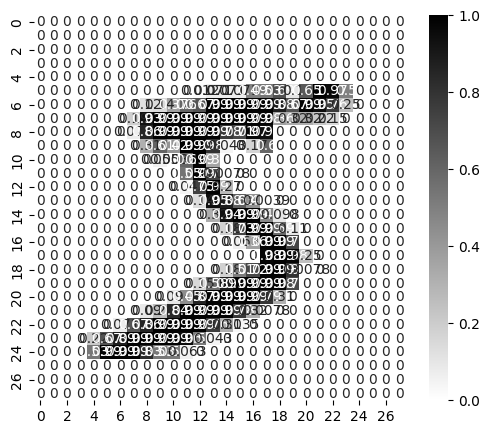

In [26]:
plt.figure(figsize=(6,5))
sns.heatmap(x_vald[0],annot=True,cmap="binary")

In [27]:
from tensorflow import keras

In [28]:
Layers = [
    tf.keras.layers.Flatten(input_shape=[28, 28], name="input_layer"),  # flatten is used to convert 2d to 1d
    tf.keras.layers.Dense(300, activation="relu", name="hidden_layer1"),
    tf.keras.layers.Dense(100, activation="relu", name="hidden_layer2"),
    tf.keras.layers.Dense(10, activation='softmax', name="output_layer")
]



In [30]:
model_clf = tf.keras.models.Sequential(Layers)

In [31]:
model_clf.layers

In [32]:
model_clf.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Flatten)       (None, 784)               0         
                                                                 
 hidden_layer1 (Dense)       (None, 300)               235500    
                                                                 
 hidden_layer2 (Dense)       (None, 100)               30100     
                                                                 
 output_layer (Dense)        (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [33]:
784*300+300 # parameter calculation

235500

In [34]:
layers1=model_clf.layers[1]

In [35]:
layers1.name

'hidden_layer1'

In [36]:
layers1.get_weights()  # these are weights associated with hidden_layer1

[array([[-0.05805045, -0.05456458, -0.0600592 , ...,  0.06231873,
          0.0659169 ,  0.0385746 ],
        [ 0.04825453, -0.06477012,  0.0460685 , ..., -0.02570705,
         -0.00981996,  0.03614783],
        [ 0.06721547,  0.00248952,  0.05717666, ..., -0.06789114,
         -0.02106684,  0.02728924],
        ...,
        [ 0.05515118, -0.05507336, -0.05459761, ..., -0.02770814,
          0.03001755,  0.07102726],
        [-0.03970244, -0.00123658, -0.0200019 , ..., -0.0534471 ,
         -0.01683691,  0.03475755],
        [-0.02196647,  0.04710594,  0.01075783, ...,  0.04461056,
         -0.04810302,  0.02883334]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

# model compilation

In [53]:
loss="sparse_categorical_crossentropy"
optimizer="SGD"
METRICS=["accuracy"]
model_clf.compile(loss=loss,optimizer=optimizer,metrics=METRICS)



# tensorflow call back  function

In [54]:
import time

def get_log_path(log_dir="logs/fit"):
  fileName = time.strftime("log_%Y_%m_%d_%H_%M_%S")
  logs_path = os.path.join(log_dir, fileName)
  print(f"Saving logs at {logs_path}")
  return logs_path

log_dir = get_log_path()
tb_cb = tf.keras.callbacks.TensorBoard(log_dir=log_dir)

Saving logs at logs/fit/log_2024_02_03_11_09_11


# early call back function # it should be done before model is going to be trained


In [55]:
early_stopping=tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)

# modelcheck point callback

In [56]:
CKPT_path = "Model_ckpt.h5"
checkpointing_cb = tf.keras.callbacks.ModelCheckpoint(CKPT_path, save_best_only=True)

# model training

In [57]:
epochs=10
validationset=(x_vald,y_val)
history =model_clf.fit(x_train ,y_train ,epochs=epochs, validation_data=validationset,batch_size=32,callbacks=[tb_cb, early_stopping,checkpointing_cb])

Epoch 1/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0985 - accuracy: 0.9727 - val_loss: 0.1057 - val_accuracy: 0.9682
Epoch 2/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.0908 - accuracy: 0.9747 - val_loss: 0.0992 - val_accuracy: 0.9724
Epoch 3/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0843 - accuracy: 0.9762 - val_loss: 0.0949 - val_accuracy: 0.9724
Epoch 4/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0778 - accuracy: 0.9784 - val_loss: 0.0912 - val_accuracy: 0.9728
Epoch 5/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0727 - accuracy: 0.9801 - val_loss: 0.0893 - val_accuracy: 0.9742
Epoch 6/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.0676 - accuracy: 0.9816 - val_loss: 0.0861 - val_accuracy: 0.9746
Epoch 7/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0634 - accuracy: 0.9829 - val_loss: 0.0860 - val_accuracy:

In [58]:
# saving the best model

In [59]:
# Checkpoint training

#loading Checkpoint model
ckpt_model = tf.keras.models.load_model(CKPT_path)

history = ckpt_model.fit(x_train, y_train, epochs=epochs,
                    validation_data=validationset, batch_size=32, callbacks=[tb_cb, early_stopping,checkpointing_cb] )


Epoch 1/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0490 - accuracy: 0.9867 - val_loss: 0.0763 - val_accuracy: 0.9774
Epoch 2/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0460 - accuracy: 0.9878 - val_loss: 0.0746 - val_accuracy: 0.9766
Epoch 3/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0434 - accuracy: 0.9888 - val_loss: 0.0760 - val_accuracy: 0.9762
Epoch 4/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0409 - accuracy: 0.9897 - val_loss: 0.0730 - val_accuracy: 0.9772
Epoch 5/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0385 - accuracy: 0.9903 - val_loss: 0.0734 - val_accuracy: 0.9768
Epoch 6/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0363 - accuracy: 0.9910 - val_loss: 0.0724 - val_accuracy: 0.9776
Epoch 7/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0342 - accuracy: 0.9918 - val_loss: 0.0730 - val_accuracy:

# saving the model

In [60]:
import time
import os

def save_model_path(MODEL_dir = "TRAINED_MODEL"):
  os.makedirs(MODEL_dir, exist_ok= True)
  fileName = time.strftime("Model_%Y_%m_%d_%H_%M_%S_.h5")
  model_path = os.path.join(MODEL_dir, fileName)
  print(f"Model {fileName} will be saved at {model_path}")
  return model_path

In [61]:
UNIQUE_PATH = save_model_path()
UNIQUE_PATH

Model Model_2024_02_03_11_12_27_.h5 will be saved at TRAINED_MODEL/Model_2024_02_03_11_12_27_.h5


'TRAINED_MODEL/Model_2024_02_03_11_12_27_.h5'

In [62]:
tf.keras.models.save_model(model_clf, UNIQUE_PATH)

<ipython-input-62-87cef6f4b7ac>:1: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  tf.keras.models.save_model(model_clf, UNIQUE_PATH)


In [63]:
history.params

{'verbose': 1, 'epochs': 10, 'steps': 1719}

In [64]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.049042,0.986745,0.076258,0.9774
1,0.045962,0.987818,0.074569,0.9766
2,0.043399,0.988836,0.075995,0.9762
3,0.040944,0.989673,0.073028,0.9772
4,0.038475,0.990327,0.073432,0.9768
5,0.036297,0.991018,0.072391,0.9776
6,0.034211,0.991764,0.073028,0.9774
7,0.032364,0.992236,0.067988,0.9794
8,0.030480,0.993091,0.071853,0.9776
9,0.028735,0.993618,0.069773,0.9792


<Axes: >

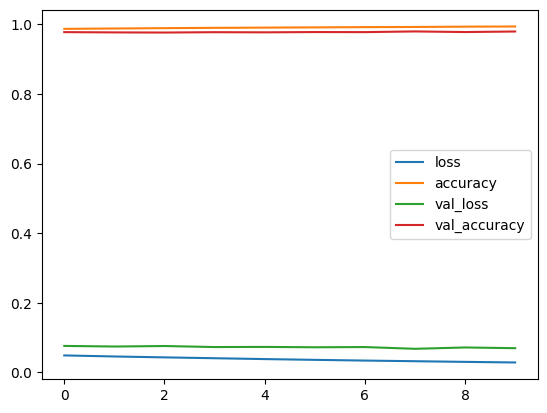

In [65]:
pd.DataFrame(history.history).plot()

# model evalution on test data

In [66]:
model_clf.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0813 - accuracy: 0.9744


[0.08131784945726395, 0.974399983882904]

In [67]:
x_new = x_test[4:8]


In [68]:
actual = y_test[4:8]

In [69]:
actual

array([4, 1, 4, 9], dtype=uint8)

In [70]:
y_prob = model_clf.predict(x_new)
y_prob.round(3)

1/1 [==============================] - 0s 112ms/step


array([[0.   , 0.   , 0.   , 0.   , 0.995, 0.   , 0.   , 0.   , 0.   ,
        0.005],
       [0.   , 0.998, 0.   , 0.   , 0.   , 0.   , 0.   , 0.001, 0.   ,
        0.   ],
       [0.   , 0.   , 0.   , 0.   , 0.988, 0.   , 0.   , 0.   , 0.01 ,
        0.002],
       [0.   , 0.   , 0.   , 0.011, 0.001, 0.   , 0.   , 0.001, 0.   ,
        0.987]], dtype=float32)

In [71]:
y_pred = np.argmax(y_prob, axis = -1)

In [72]:
y_pred

array([4, 1, 4, 9])

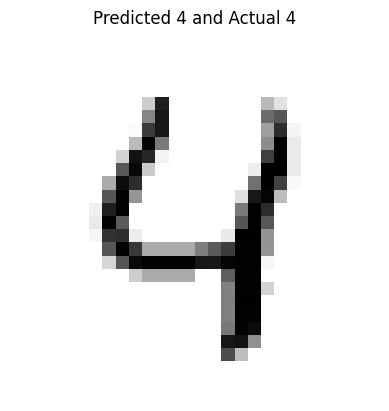

######################


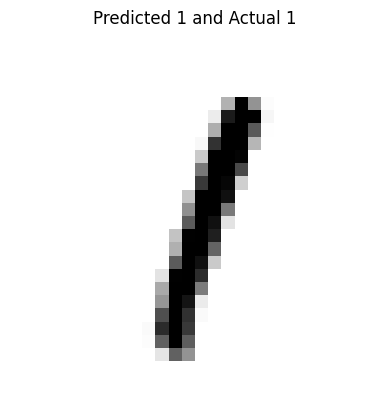

######################


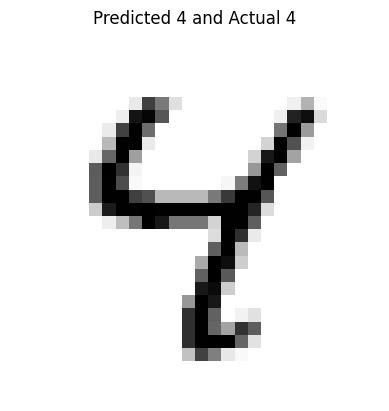

######################


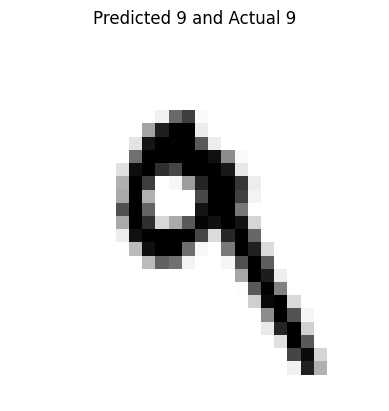

######################


In [73]:
# plot
for data, pred, actual_data in zip(x_new, y_pred, actual):
  plt.imshow(data, cmap="binary")
  plt.title(f"Predicted {pred} and Actual {actual_data}")
  plt.axis("off")
  plt.show()
  print("######################")

In [74]:
os.listdir("TRAINED_MODEL")

['Model_2024_01_31_17_08_28_.h5', 'Model_2024_02_03_11_12_27_.h5']

In [75]:
path_name_model = "TRAINED_MODEL/Model_2024_01_31_17_08_28_.h5"
loaded_model = tf.keras.models.load_model(path_name_model)
loaded_model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1153 - accuracy: 0.9659


[0.11528309434652328, 0.9659000039100647]

In [76]:
predict= loaded_model.predict(x_new)
classes=np.argmax(predict,axis=1)

1/1 [==============================] - 0s 60ms/step


In [77]:
classes

array([4, 1, 4, 9])

In [78]:
%load_ext tensorboard

In [79]:
%tensorboard --logdir logs/fit

<IPython.core.display.Javascript object>

In [ ]:
pip install tensorboard
